In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [10]:
# 1. Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with your actual dataset file path
df = pd.read_csv('./data/selected_features.csv')
df.columns

Index(['property_id', 'largest_property_use_type_1', 'year_built',
       'number_of_buildings', 'occupancy', 'national_median_energy_star',
       'national_median_site_eui', 'national_median_source_eui',
       'net_emissions_metric_tons', 'national_median_total_ghg',
       'egrid_output_emissions_rate', 'multifamily_housing_gross',
       'multifamily_housing_total', 'multifamily_housing_percent',
       'multifamily_housing_percent_1', 'property_gfa_self_reported',
       'property_gfa_calculated', 'number_of_active_energy_meters',
       'number_of_active_it_meters', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract'],
      dtype='object')

In [12]:
# Select the columns of interest for X and Y
X = df[['number_of_buildings', 'multifamily_housing_gross']]
y = df['net_emissions_metric_tons']

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Create a Linear Regression model
model = LinearRegression()

# 5. Train the model on the training data
model.fit(X_train, y_train)

# 6. Make predictions on the test data
y_pred = model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

# 9. Retrieve the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 490886.1400118535
R-squared (R2) Score: 0.7273591058314218
Coefficients: [4.37034823e+01 5.41442560e-03]
Intercept: -108.12707511727547


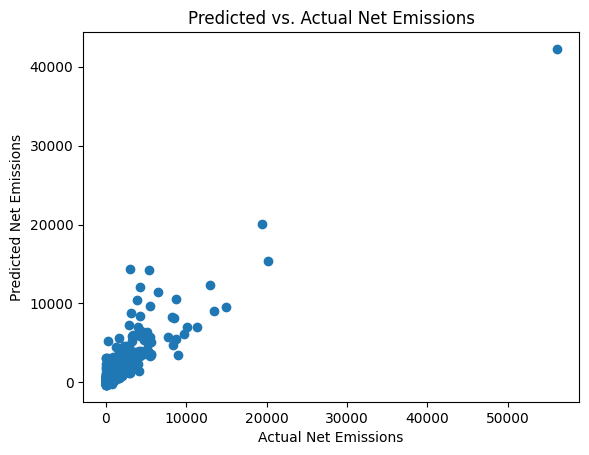

In [8]:
# 10. Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Net Emissions")
plt.ylabel("Predicted Net Emissions")
plt.title("Predicted vs. Actual Net Emissions")
plt.show()
